In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
from scipy.special import expit
import sklearn.model_selection as ms
from sklearn import preprocessing
from ipywidgets import interact, interactive, fixed, interact_manual

import sys
sys.path.append("../libs")
from helpers import *
from esnlib import *
%matplotlib inline

In [53]:
n_reservoir = 1000
sparsity = [0,0.5,0.9]
leaking_rate = [1,0.5,0.1]
regularization= [0,1e-5,1,2]
spectral_radius= [1e-8,0.1,1,2]
activation = [np.tanh,expit]
param_grid = {"n_reservoir":[n_reservoir], "sparsity":sparsity, "leaking_rate":leaking_rate, "regularization":regularization, "activation": activation, "spectral_radius":spectral_radius}
params = ms.ParameterGrid(param_grid)

In [54]:
# Reading Validation scores
scores_6_lags = pd.read_csv("../../results/esn/scores_6.csv", index_col=0, names=["f0","f1","f2","f3","f3"])
scores_12_lags = pd.read_csv("../../results/esn/scores_12.csv", index_col=0, names=["f0","f1","f2","f3","f3"])
scores_24_lags = pd.read_csv("../../results/esn/scores_24.csv", index_col=0, names=["f0","f1","f2","f3","f3"])
scores_48_lags = pd.read_csv("../../results/esn/scores_48.csv", index_col=0, names=["f0","f1","f2","f3","f3"])
scores_72_lags = pd.read_csv("../../results/esn/scores_72.csv", index_col=0, names=["f0","f1","f2","f3","f3"])

In [55]:
scores_6_mean = scores_6_lags.mean(axis=1)
scores_12_mean = scores_12_lags.mean(axis=1)
scores_24_mean = scores_24_lags.mean(axis=1)
scores_48_mean = scores_48_lags.mean(axis=1)
scores_72_mean = scores_72_lags.mean(axis=1)

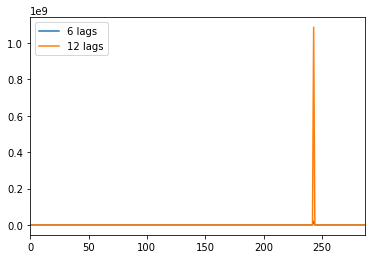

In [56]:
fig,ax = plt.subplots(1,1)
scores_6_mean.plot(label="6 lags",ax=ax)
scores_12_mean.plot(label="12 lags",ax=ax)
plt.legend()

In [98]:
scores_6_mean_filtered = scores_6_mean[scores_6_mean< 0.1]
scores_12_mean_filtered = scores_12_mean[scores_12_mean< 0.1]
scores_24_mean_filtered = scores_24_mean[scores_24_mean< 0.1]
scores_48_mean_filtered = scores_48_mean[scores_48_mean< 0.1]
scores_72_mean_filtered = scores_72_mean[scores_72_mean< 0.1]

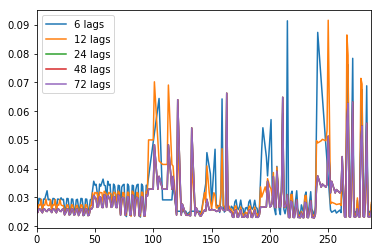

In [99]:
fig,ax = plt.subplots(1,1)
scores_6_mean_filtered.plot(label="6 lags",ax=ax)
scores_12_mean_filtered.plot(label="12 lags",ax=ax)
scores_24_mean_filtered.plot(label="24 lags",ax=ax)
scores_24_mean_filtered.plot(label="48 lags",ax=ax)
scores_24_mean_filtered.plot(label="72 lags",ax=ax)

plt.legend()

In [59]:
best_val_6 = scores_6_mean.argmin()
best_val_12 = scores_12_mean.argmin()
best_val_24 = scores_24_mean.argmin()
best_val_48 = scores_48_mean.argmin()
best_val_72 = scores_72_mean.argmin()

In [60]:
params[best_val_6]

{'activation': <ufunc 'expit'>,
 'leaking_rate': 0.5,
 'n_reservoir': 1000,
 'regularization': 1,
 'sparsity': 0.9,
 'spectral_radius': 1}

In [61]:
params[best_val_12]

{'activation': <ufunc 'expit'>,
 'leaking_rate': 0.5,
 'n_reservoir': 1000,
 'regularization': 1,
 'sparsity': 0.9,
 'spectral_radius': 1}

In [62]:
params[best_val_24]

{'activation': <ufunc 'expit'>,
 'leaking_rate': 0.5,
 'n_reservoir': 1000,
 'regularization': 2,
 'sparsity': 0.9,
 'spectral_radius': 1}

In [63]:
params[best_val_72]

{'activation': <ufunc 'expit'>,
 'leaking_rate': 0.1,
 'n_reservoir': 1000,
 'regularization': 2,
 'sparsity': 0.9,
 'spectral_radius': 0.1}

### 6 lags best model

In [64]:
## Loading data
print("Reading Data")
data = pd.Series.from_csv('../../data/potency/canela1.csv')

#Data split parameters
input_steps = 6
prediction_steps = 12
train_perc = 0.8

X,y = getDataWindowed(data,input_steps,prediction_steps)

trainlen = int(train_perc*len(X))
X_train,X_test = X[:trainlen], X[trainlen:]
y_train,y_test = y[:trainlen], y[trainlen:]


#Preprocess data
print("Preprocessing Data")
minmax_in = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax_out = preprocessing.MinMaxScaler(feature_range=(0,1))

minmax_in.fit(X_train)
minmax_out.fit(y_train)
preproc_in = minmax_in
preproc_out = minmax_out

X_train = preproc_in.transform(X_train) if preproc_in else X_train
X_test = preproc_in.transform(X_test) if preproc_in else X_test

y_train = preproc_out.transform(y_train) if preproc_out else y_train

Reading Data
Preprocessing Data


In [65]:
clf = ESN(random_state=42,**params[best_val_6])
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test,cont=True)
y_pred = preproc_out.inverse_transform(y_pred)

In [66]:
y_test_6 = y_test
y_pred_6 = y_pred

In [67]:
show_errors(y_test,y_pred)

,$t+0$,$t+1$,$t+2$,$t+3$,$t+4$,$t+5$,$t+6$,$t+7$,$t+8$,$t+9$,$t+10$,$t+11$,$\overline{t+i}$
MAE,1.160985,1.441492,1.643702,1.818686,1.954897,2.069426,2.157478,2.227660,2.285173,2.328150,2.361639,2.389148,1.986536
MSE,3.386875,4.820154,5.945235,6.905700,7.685051,8.358154,8.885267,9.323060,9.650746,9.909890,10.092747,10.240978,7.933655
MeAE,0.625926,0.849249,1.029854,1.192977,1.317995,1.419951,1.514599,1.593716,1.650707,1.694949,1.743739,1.771522,1.367099
MAPE,0.444472,0.551866,0.629295,0.696273,0.748413,0.792245,0.825937,0.852807,0.874771,0.891187,0.903854,0.914234,0.760446
$r^2$,0.727930,0.612797,0.522429,0.445265,0.382655,0.328574,0.286229,0.251059,0.224741,0.203946,0.189322,0.177502,0.362704


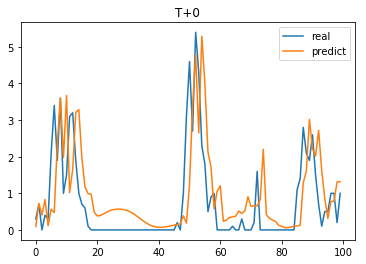

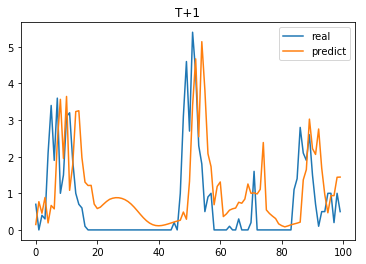

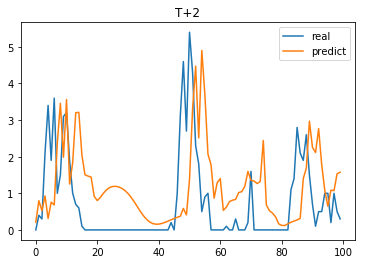

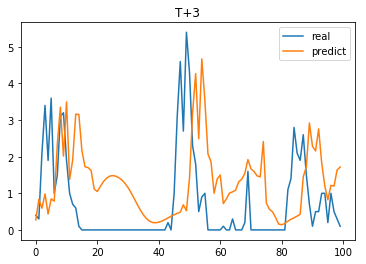

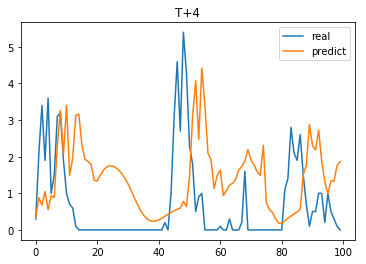

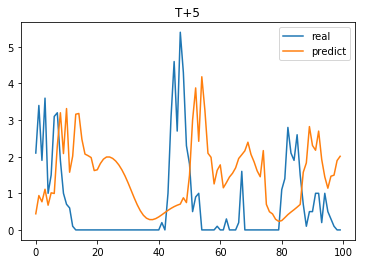

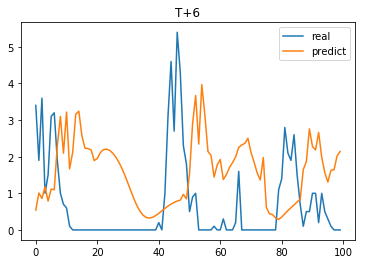

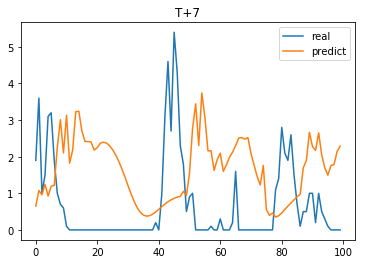

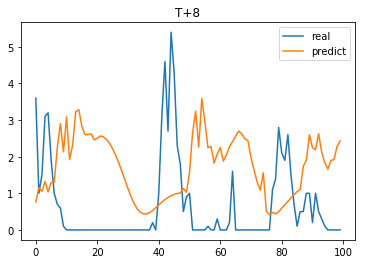

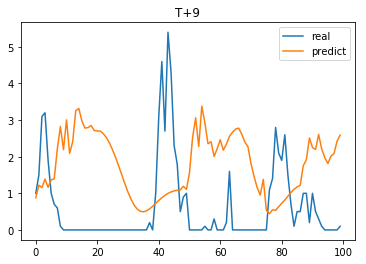

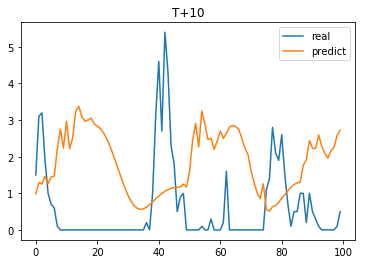

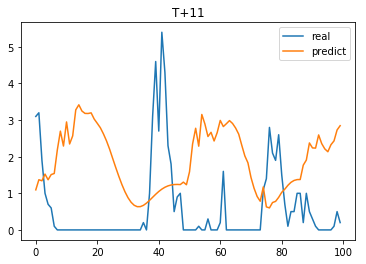

In [68]:
for i in range(12):
    plt.title("T+{}".format(i))
    plt.plot(y_test[:100,i], label="real")
    plt.plot(y_pred[:100,i], label="predict")
    plt.legend()
    plt.show()

### 12 lags best model

In [69]:
#Data split parameters
input_steps = 12
prediction_steps = 12
train_perc = 0.8

X,y = getDataWindowed(data,input_steps,prediction_steps)

trainlen = int(train_perc*len(X))
X_train,X_test = X[:trainlen], X[trainlen:]
y_train,y_test = y[:trainlen], y[trainlen:]


#Preprocess data
print("Preprocessing Data")
minmax_in = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax_out = preprocessing.MinMaxScaler(feature_range=(0,1))

minmax_in.fit(X_train)
minmax_out.fit(y_train)
preproc_in = minmax_in
preproc_out = minmax_out

X_train = preproc_in.transform(X_train) if preproc_in else X_train
X_test = preproc_in.transform(X_test) if preproc_in else X_test

y_train = preproc_out.transform(y_train) if preproc_out else y_train

Preprocessing Data


In [70]:
clf = ESN(random_state=42,**params[best_val_12])
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test,cont=True)
y_pred = preproc_out.inverse_transform(y_pred)

In [71]:
y_test_12 = y_test
y_pred_12 = y_pred

In [72]:
show_errors(y_test,y_pred)

,$t+0$,$t+1$,$t+2$,$t+3$,$t+4$,$t+5$,$t+6$,$t+7$,$t+8$,$t+9$,$t+10$,$t+11$,$\overline{t+i}$
MAE,1.160516,1.439857,1.640124,1.811878,1.948406,2.061649,2.150805,2.222389,2.280666,2.324393,2.357486,2.385141,1.981943
MSE,3.371210,4.795615,5.917433,6.874896,7.647531,8.312064,8.840934,9.282473,9.616030,9.875843,10.062106,10.209553,7.900474
MeAE,0.635623,0.844073,1.019180,1.179626,1.313700,1.422985,1.517842,1.602272,1.662139,1.702422,1.725555,1.768000,1.366118
MAPE,0.444274,0.551215,0.627844,0.693565,0.745700,0.788913,0.822882,0.850095,0.872163,0.888676,0.901139,0.911504,0.758164
$r^2$,0.729184,0.614758,0.524644,0.447745,0.385729,0.332421,0.290130,0.254929,0.228445,0.207774,0.192941,0.181245,0.365829


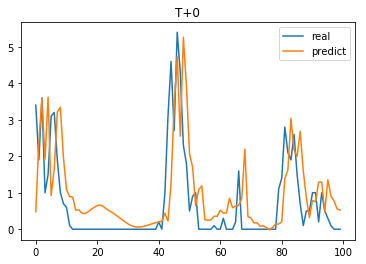

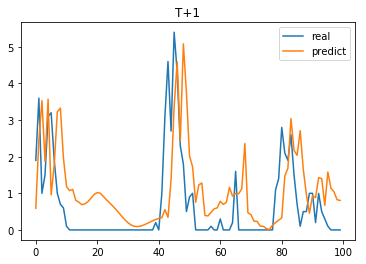

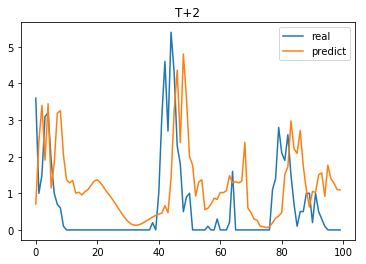

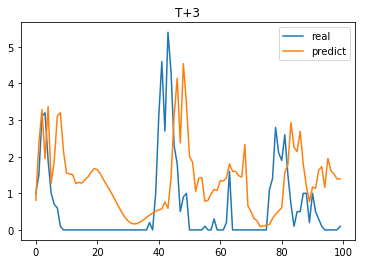

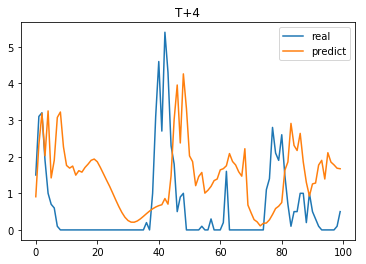

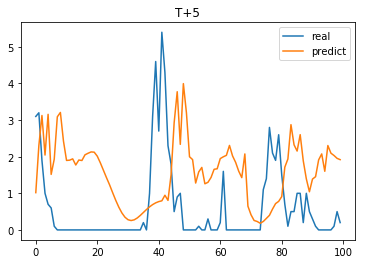

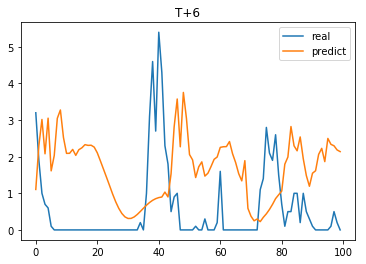

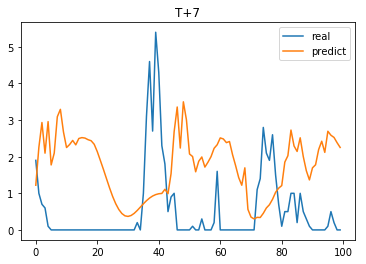

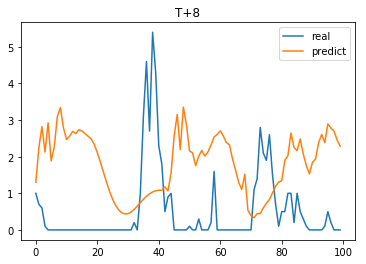

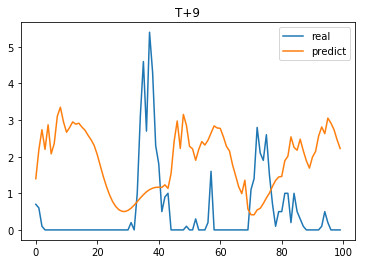

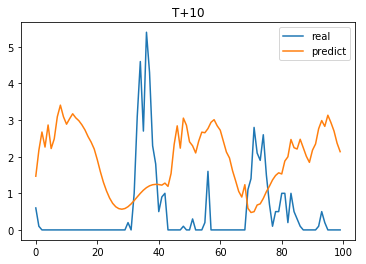

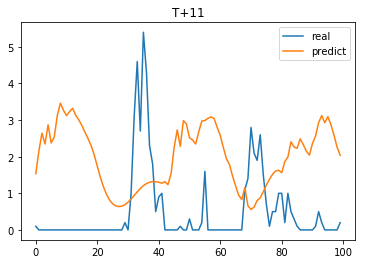

In [73]:
for i in range(12):
    plt.title("T+{}".format(i))
    plt.plot(y_test[:100,i], label="real")
    plt.plot(y_pred[:100,i], label="predict")
    plt.legend()
    plt.show()

## 24 lags model

In [74]:
#Data split parameters
input_steps = 24
prediction_steps = 12
train_perc = 0.8

X,y = getDataWindowed(data,input_steps,prediction_steps)

trainlen = int(train_perc*len(X))
X_train,X_test = X[:trainlen], X[trainlen:]
y_train,y_test = y[:trainlen], y[trainlen:]


#Preprocess data
print("Preprocessing Data")
minmax_in = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax_out = preprocessing.MinMaxScaler(feature_range=(0,1))

minmax_in.fit(X_train)
minmax_out.fit(y_train)
preproc_in = minmax_in
preproc_out = minmax_out

X_train = preproc_in.transform(X_train) if preproc_in else X_train
X_test = preproc_in.transform(X_test) if preproc_in else X_test

y_train = preproc_out.transform(y_train) if preproc_out else y_train

Preprocessing Data


In [75]:
clf = ESN(random_state=42,**params[best_val_12])
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test,cont=True)
y_pred = preproc_out.inverse_transform(y_pred)

In [76]:
y_test_24 = y_test
y_pred_24 = y_pred

In [77]:
show_errors(y_test,y_pred)

,$t+0$,$t+1$,$t+2$,$t+3$,$t+4$,$t+5$,$t+6$,$t+7$,$t+8$,$t+9$,$t+10$,$t+11$,$\overline{t+i}$
MAE,1.157948,1.432336,1.628971,1.797048,1.932218,2.047715,2.136168,2.206346,2.264868,2.309852,2.345663,2.375011,1.969512
MSE,3.362974,4.771670,5.883124,6.829182,7.592471,8.251351,8.765372,9.191717,9.521225,9.788235,9.980061,10.135862,7.839437
MeAE,0.631459,0.852489,1.020655,1.172030,1.295954,1.418271,1.494079,1.573409,1.639121,1.692825,1.726852,1.752777,1.355827
MAPE,0.443182,0.548209,0.623459,0.687771,0.739476,0.783668,0.817527,0.844439,0.866927,0.884178,0.897966,0.909204,0.753834
$r^2$,0.729924,0.616800,0.527536,0.451551,0.390233,0.337310,0.296034,0.261825,0.235393,0.213966,0.198576,0.186066,0.370435


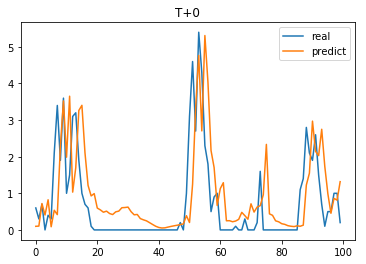

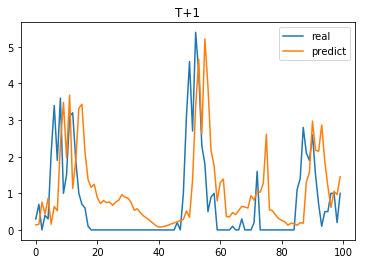

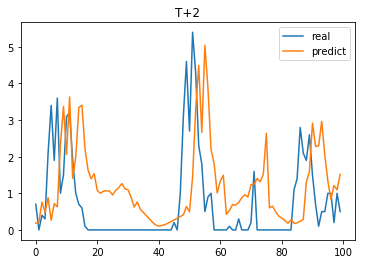

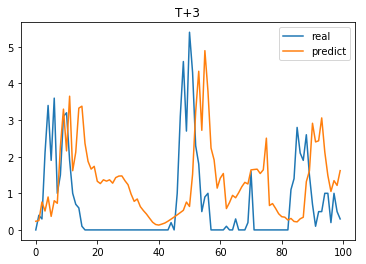

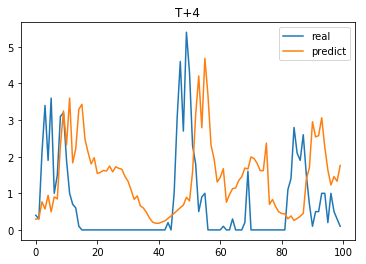

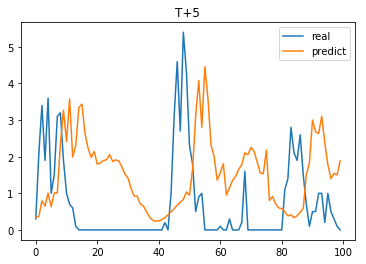

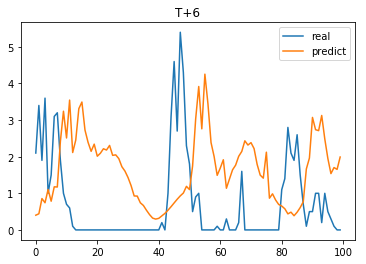

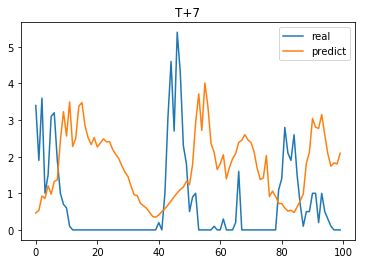

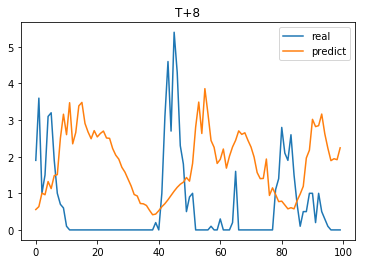

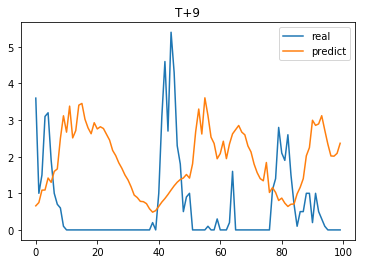

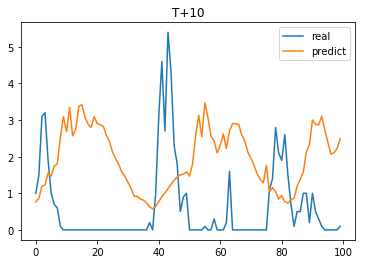

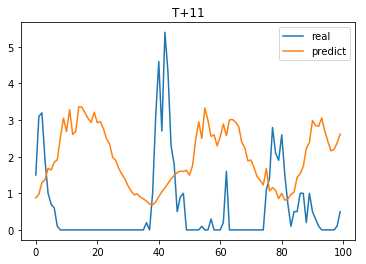

In [78]:
for i in range(12):
    plt.title("T+{}".format(i))
    plt.plot(y_test[:100,i], label="real")
    plt.plot(y_pred[:100,i], label="predict")
    plt.legend()
    plt.show()

## 48 lags

In [79]:
#Data split parameters
input_steps = 48
prediction_steps = 12
train_perc = 0.8

X,y = getDataWindowed(data,input_steps,prediction_steps)

trainlen = int(train_perc*len(X))
X_train,X_test = X[:trainlen], X[trainlen:]
y_train,y_test = y[:trainlen], y[trainlen:]


#Preprocess data
print("Preprocessing Data")
minmax_in = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax_out = preprocessing.MinMaxScaler(feature_range=(0,1))

minmax_in.fit(X_train)
minmax_out.fit(y_train)
preproc_in = minmax_in
preproc_out = minmax_out

X_train = preproc_in.transform(X_train) if preproc_in else X_train
X_test = preproc_in.transform(X_test) if preproc_in else X_test

y_train = preproc_out.transform(y_train) if preproc_out else y_train

Preprocessing Data


In [80]:
clf = ESN(random_state=42,**params[best_val_12])
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test,cont=True)
y_pred = preproc_out.inverse_transform(y_pred)

In [81]:
y_test_48 = y_test
y_pred_48 = y_pred

In [82]:
show_errors(y_test,y_pred)

,$t+0$,$t+1$,$t+2$,$t+3$,$t+4$,$t+5$,$t+6$,$t+7$,$t+8$,$t+9$,$t+10$,$t+11$,$\overline{t+i}$
MAE,1.174974,1.446266,1.642069,1.807256,1.935797,2.043912,2.131973,2.204402,2.260843,2.304420,2.339449,2.369981,1.971778
MSE,3.426129,4.871530,6.011676,6.988203,7.774920,8.454686,8.998628,9.450589,9.777763,10.037003,10.209499,10.339883,8.028376
MeAE,0.661276,0.860569,1.021812,1.162391,1.282982,1.385010,1.467667,1.553988,1.601203,1.640255,1.685605,1.727699,1.337538
MAPE,0.449731,0.553571,0.628516,0.691743,0.740943,0.782325,0.816031,0.843754,0.865357,0.882036,0.895444,0.907130,0.754715
$r^2$,0.725053,0.609059,0.517562,0.439196,0.376061,0.321510,0.277859,0.241589,0.215333,0.194529,0.180686,0.170223,0.355722


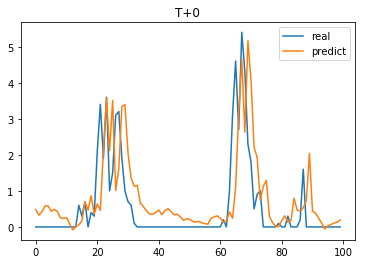

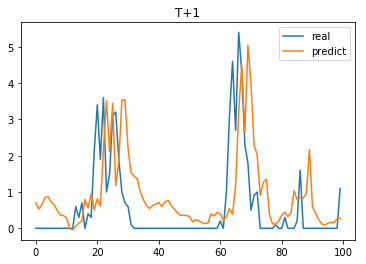

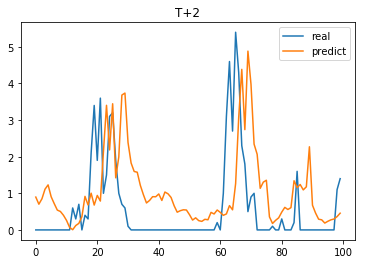

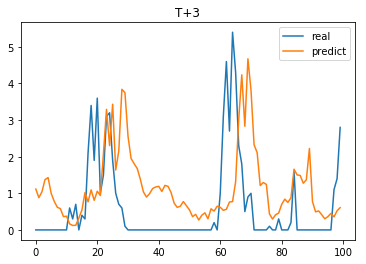

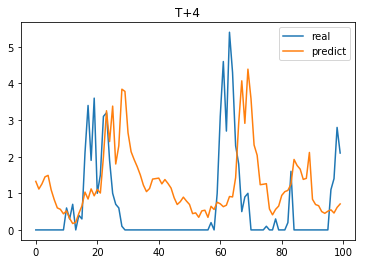

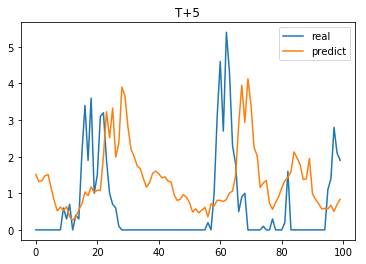

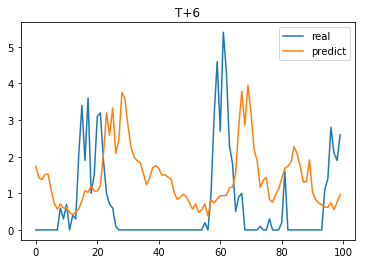

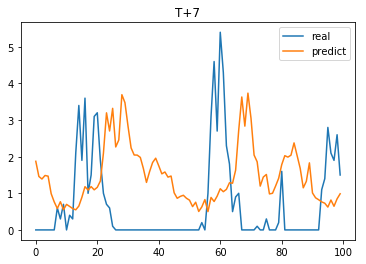

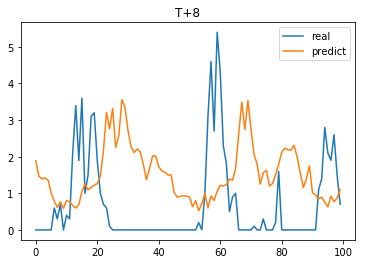

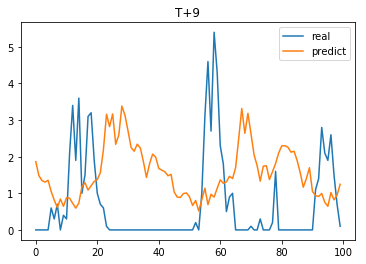

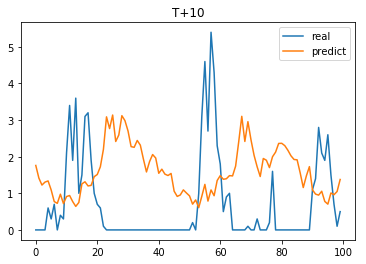

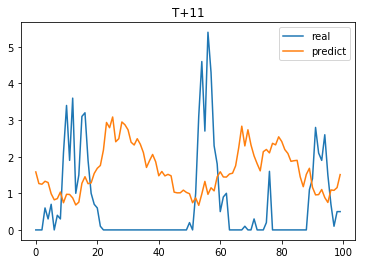

In [83]:
for i in range(12):
    plt.title("T+{}".format(i))
    plt.plot(y_test[:100,i], label="real")
    plt.plot(y_pred[:100,i], label="predict")
    plt.legend()
    plt.show()

## 72 Lags  

In [84]:
#Data split parameters
input_steps = 72
prediction_steps = 12
train_perc = 0.8

X,y = getDataWindowed(data,input_steps,prediction_steps)

trainlen = int(train_perc*len(X))
X_train,X_test = X[:trainlen], X[trainlen:]
y_train,y_test = y[:trainlen], y[trainlen:]


#Preprocess data
print("Preprocessing Data")
minmax_in = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax_out = preprocessing.MinMaxScaler(feature_range=(0,1))

minmax_in.fit(X_train)
minmax_out.fit(y_train)
preproc_in = minmax_in
preproc_out = minmax_out

X_train = preproc_in.transform(X_train) if preproc_in else X_train
X_test = preproc_in.transform(X_test) if preproc_in else X_test

y_train = preproc_out.transform(y_train) if preproc_out else y_train

Preprocessing Data


In [85]:
clf = ESN(random_state=42,**params[best_val_12])
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test,cont=True)
y_pred = preproc_out.inverse_transform(y_pred)

In [86]:
y_test_72 = y_test
y_pred_72 = y_pred

In [87]:
show_errors(y_test,y_pred)

,$t+0$,$t+1$,$t+2$,$t+3$,$t+4$,$t+5$,$t+6$,$t+7$,$t+8$,$t+9$,$t+10$,$t+11$,$\overline{t+i}$
MAE,1.188669,1.462347,1.657163,1.818917,1.947431,2.061956,2.149069,2.218380,2.276078,2.326821,2.373898,2.411928,1.991055
MSE,3.454888,4.918528,6.068741,7.016391,7.803840,8.485411,9.038712,9.475109,9.795561,10.106629,10.397101,10.645293,8.100517
MeAE,0.691095,0.892388,1.054046,1.195463,1.304626,1.421559,1.505428,1.590464,1.650316,1.711468,1.764577,1.787600,1.380752
MAPE,0.454562,0.559244,0.633784,0.695735,0.744916,0.788728,0.822050,0.848563,0.870633,0.890043,0.908051,0.922598,0.761576
$r^2$,0.722819,0.605406,0.513149,0.437143,0.373991,0.319322,0.274937,0.239930,0.214225,0.189272,0.165971,0.146061,0.350185


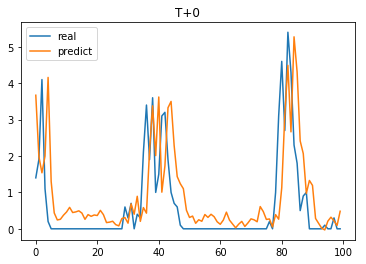

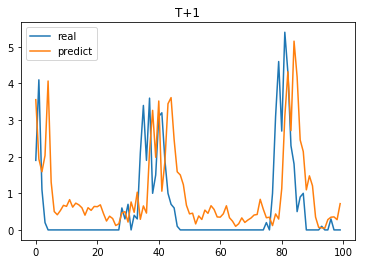

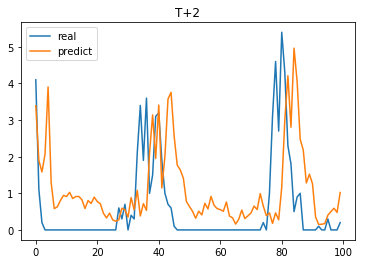

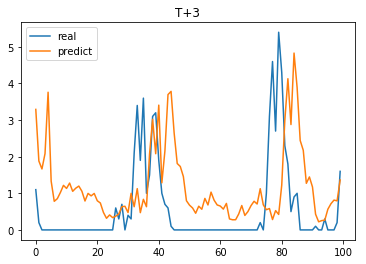

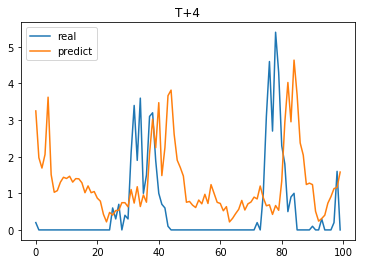

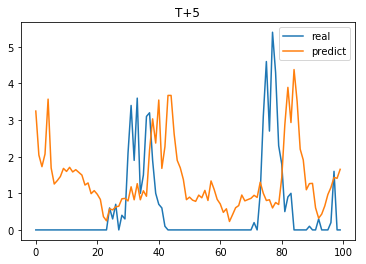

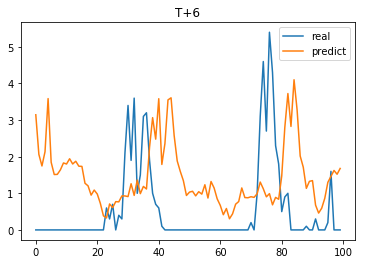

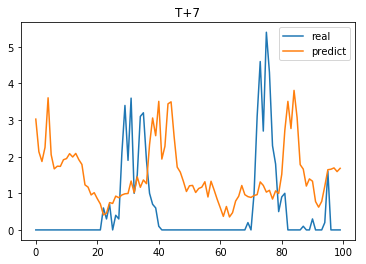

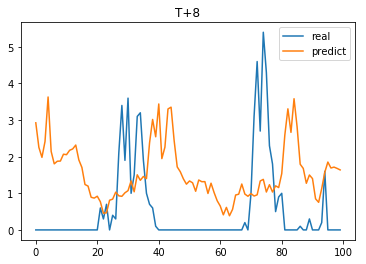

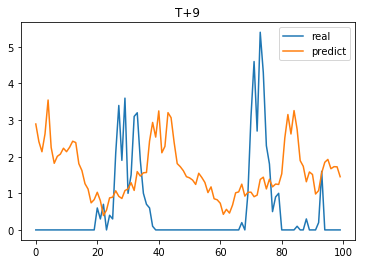

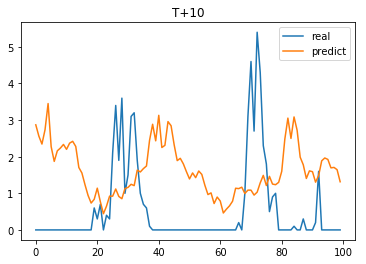

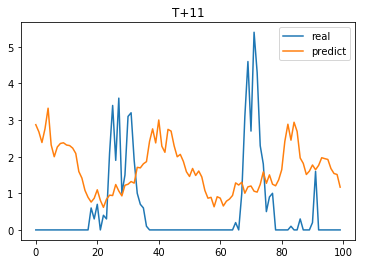

In [88]:
for i in range(12):
    plt.title("T+{}".format(i))
    plt.plot(y_test[:100,i], label="real")
    plt.plot(y_pred[:100,i], label="predict")
    plt.legend()
    plt.show()

In [89]:
y_pred_arima = pd.read_csv("../../results/arima/canela1_y_approx.csv").values
y_test_arima  = pd.read_csv("../../results/arima/canela1_y_test.csv").values

In [90]:
i = 1
j = 0

In [91]:
def plot_series(i,j):
    plt.plot(y_test_arima[(100*i)+3:100*(i+1)+3, j], label="real")
    plt.plot(y_pred_arima[(100*i)+3:100*(i+1)+3, j], label="ARIMA (1,1,1)")
    plt.plot(y_pred_6[(100*i)+17:100*(i+1)+17, j], label="6lag-ESN")
    plt.plot(y_pred_12[(100*i)+11:100*(i+1)+11, j], label="12lag-ESN")
    plt.legend()
    plt.show()

In [92]:
interact(plot_series,i=(0,100),j=(0,11))

A Jupyter Widget

<function __main__.plot_series>

In [93]:
from bokeh.plotting import figure, output_notebook, show
output_notebook()

Loading BokehJS ...

In [94]:
def plot_series2(i,j):
    p = figure(plot_width=800, plot_height=400)

    p.line(range(100),y_test_arima[(100*i)+3:100*(i+1)+3, j], legend="real",color="red")
    p.line(range(100),y_pred_arima[(100*i)+3:100*(i+1)+3, j], legend="ARIMA (1,1,1)", color="blue")
    p.line(range(100),y_pred_6[(100*i)+17:100*(i+1)+17, j], legend="6lag-ESN", color="green")
    p.line(range(100),y_pred_12[(100*i)+11:100*(i+1)+11, j], legend="12lag-ESN", color="yellow")
    show(p)

In [95]:
interact(plot_series2,i=(0,100),j=(0,11))

A Jupyter Widget

<function __main__.plot_series2>